### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Create sample data (house size vs. price)


In [2]:
x = np.array([650, 785, 900, 1000, 1200, 1400, 1600, 1800, 2000, 2200]).reshape(-1, 1)
y = np.array([150, 180, 200, 210, 250, 270, 300, 320, 340, 360])

### Split the data into training and test sets


#### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)
# train_test_split --> chia dữ liệu thành các bộ huấn luyện và kiểm tra
# test_size=0.2 -> Dữ liệu sẽ được chia theo tỷ lệ 80% cho huấn luyện và 20% cho kiểm tra.
# shuffle=True -> dữ liệu sẽ được xáo trộn trước khi chia thành bộ huấn luyện và kiểm tra để đảm bảo tính ngẫu nhiên

print("Training samples:", len(x_train))  # In số lượng mẫu trong bộ huấn luyện
print("Test samples:", len(x_test)) # In số lượng mẫu trong bộ kiểm tra

print("Training samples:", y_train) # In nhãn mục tiêu của bộ huấn luyện
print("Test target samples:", len(y_test)) # In số lượng nhãn mục tiêu của bộ kiểm tra


Training samples: 8
Test samples: 2
Training samples: [270 150 320 200 360 250 210 300]
Test target samples: 2


### Train a LinearRegression model

In [4]:
model = LinearRegression() # Khởi tạo mô hình hồi quy tuyến tính (Linear Regression)
model.fit(x_train, y_train) # Huấn luyện mô hình với dữ liệu huấn luyện (x_train và y_train)

print("Intercept:", model.intercept_) # In ra hệ số chặn (intercept) của mô hình
print("Slope:", model.coef_) # In ra hệ số góc (slope) của mô hình

Intercept: 77.04634855481444
Slope: [0.13429109]


### Make predictions


In [5]:
y_pred = model.predict(x_test)  # Dự đoán giá trị đầu ra từ dữ liệu kiểm tra
print("Predicted prices:", y_pred)  # In ra giá trị dự đoán
print("My test prices to evaluate model:", y_test)  # In ra giá trị thực tế của dữ liệu kiểm tra

Predicted prices: [345.62852745 182.46485377]
My test prices to evaluate model: [340 180]


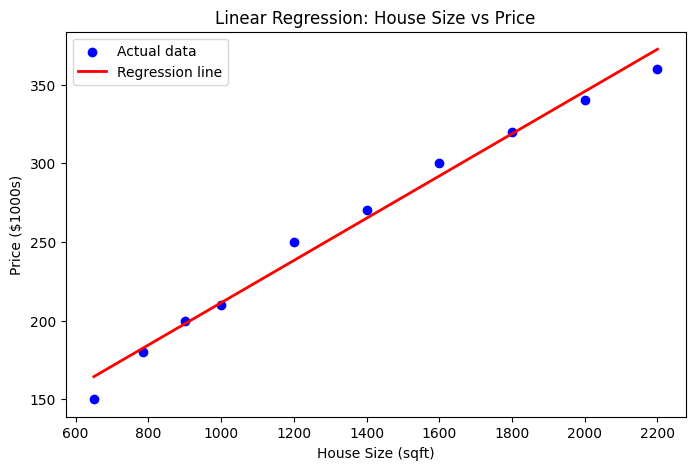

In [6]:
plt.figure(figsize=(8,5))  # Tạo một figure mới với kích thước 8x5 inch
plt.scatter(x, y, color='blue', label='Actual data')  # Vẽ đồ thị phân tán (scatter plot) cho dữ liệu thực tế với màu xanh và chú thích 'Actual data'
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression line')  # Vẽ đường hồi quy (regression line) với màu đỏ và độ dày đường là 2, chú thích 'Regression line'
plt.xlabel('House Size (sqft)')  # Gắn nhãn cho trục x là 'House Size (sqft)'
plt.ylabel('Price ($1000s)')  # Gắn nhãn cho trục y là 'Price ($1000s)'
plt.title('Linear Regression: House Size vs Price')  # Gắn tiêu đề cho đồ thị
plt.legend()  # Hiển thị legend (chú thích) để phân biệt dữ liệu thực tế và đường hồi quy
plt.show()  # Hiển thị đồ thị

In [7]:
mse = mean_squared_error(y_test, y_pred)  
# Tính toán lỗi bình phương trung bình (Mean Squared Error) giữa giá trị thực tế (y_test) và giá trị dự đoán (y_pred)

r2 = r2_score(y_test, y_pred)  # Tính toán chỉ số R²(Coefficient of Determination) để đánh giá độ khớp của mô hình
print("Mean Squared Error:", round(mse, 2))  # In ra lỗi bình phương trung bình làm tròn đến 2 chữ số thập phân
print("R² Score:", round(r2, 2))  # In ra chỉ số R² làm tròn đến 2 chữ số thập phân

Mean Squared Error: 18.88
R² Score: 1.0
